In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('classic')

In [2]:
df = pd.read_csv('FlaskPhish\dataset_phishing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
url                           11430 non-null object
length_url                    11430 non-null int64
length_hostname               11430 non-null int64
ip                            11430 non-null int64
nb_dots                       11430 non-null int64
nb_hyphens                    11430 non-null int64
nb_at                         11430 non-null int64
nb_qm                         11430 non-null int64
nb_and                        11430 non-null int64
nb_or                         11430 non-null int64
nb_eq                         11430 non-null int64
nb_underscore                 11430 non-null int64
nb_tilde                      11430 non-null int64
nb_percent                    11430 non-null int64
nb_slash                      11430 non-null int64
nb_star                       11430 non-null int64
nb_colon                      11430 non-null int64
nb_comma               

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


### url is no use in since rest of the features are derived from it so dropping url 

In [4]:
df = df.drop(['url'], axis = 1)

In [5]:
df.nunique()

length_url          324
length_hostname      83
ip                    2
nb_dots              19
nb_hyphens           27
                   ... 
web_traffic        4744
dns_record            2
google_index          2
page_rank            11
status                2
Length: 88, dtype: int64

In [6]:
def null(df, thresh = 0):
    for c in df.columns:
        n = df[c].isnull().values.sum()
        if n > thresh:
            print(f"{c} ===> {n}")

In [7]:
null(df)

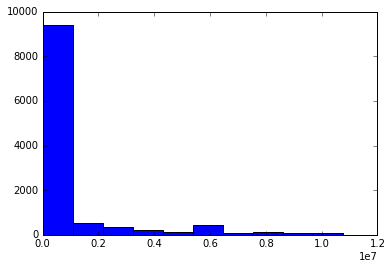

In [8]:
plt.hist(df.web_traffic);

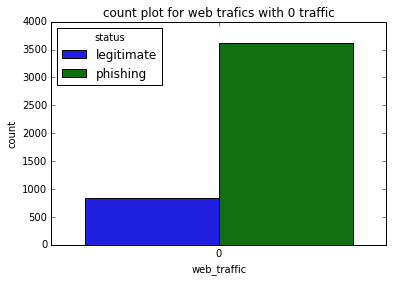

In [9]:
wt = df[['web_traffic','status']][df.web_traffic == 0]
plt.title('count plot for web trafics with 0 traffic')
sns.countplot(data = wt, x = 'web_traffic', hue = 'status')

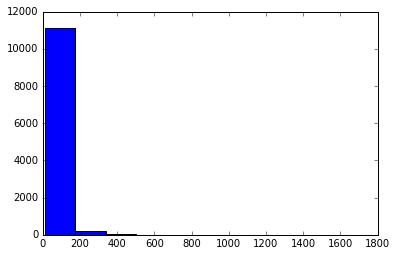

In [10]:
plt.hist(df.length_url);

In [11]:
cols = df.columns
def plot(df, rc, cols, hue = None, ptype = 'dist'):
    fig, ax = plt.subplots(rc[0],rc[1], figsize = (16,8))
    ind = 0
    for r in range(rc[0]):
        for c in range(rc[1]):
            if ind > len(cols):
                break
            col = cols[ind]
            x = df[col]
            if ptype == 'dist':
                sns.distplot(x, ax = ax[r,c])
            elif ptype == 'bar':
                sns.countplot(x, ax = ax[r,c], hue = hue)
            ind += 1

In [12]:
cols_to_dist = [c for c in cols if df[c].nunique() > 2]
len(cols_to_dist)

50

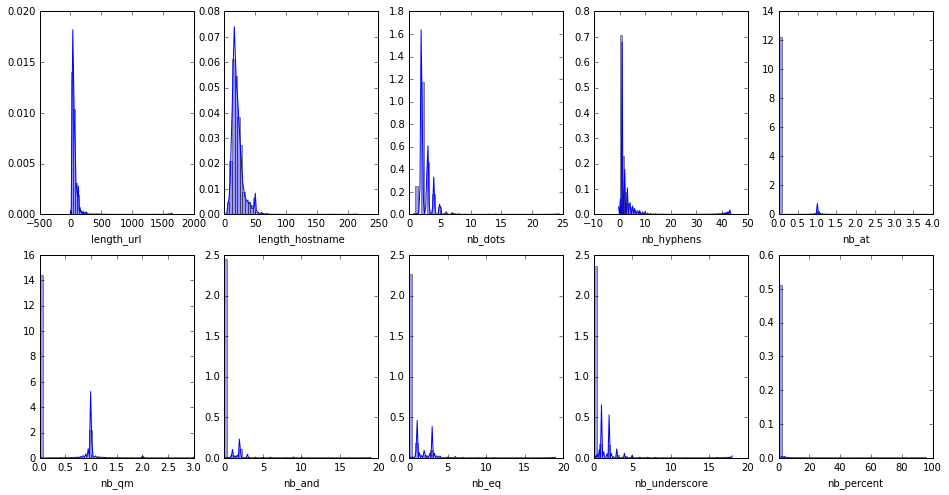

In [13]:
plot(df[cols_to_dist[:10]], [2,5], cols_to_dist[:10])

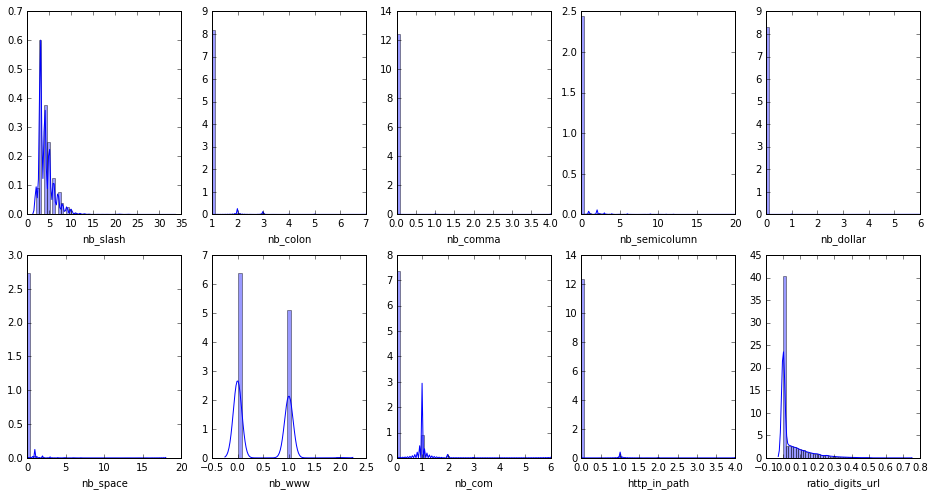

In [14]:
plot(df[cols_to_dist[10:20]], [2,5], cols_to_dist[10:20])

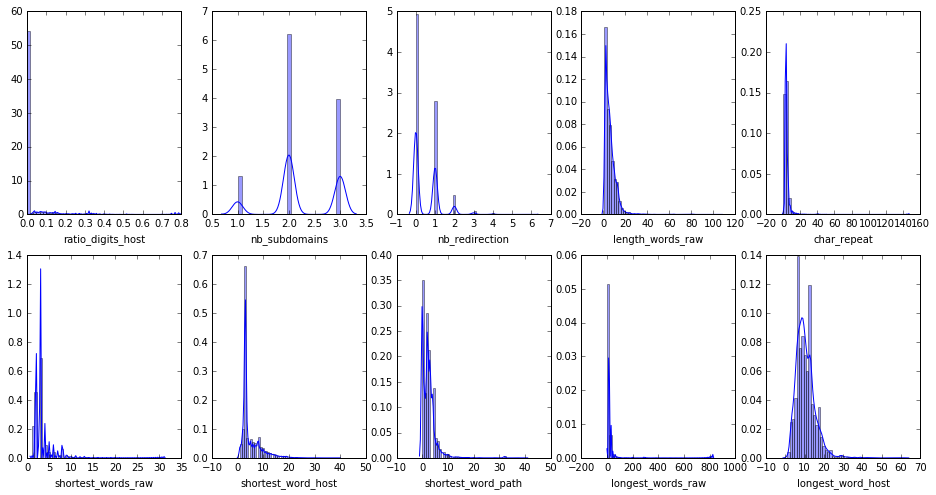

In [15]:
plot(df[cols_to_dist[20:30]], [2,5], cols_to_dist[20:30])

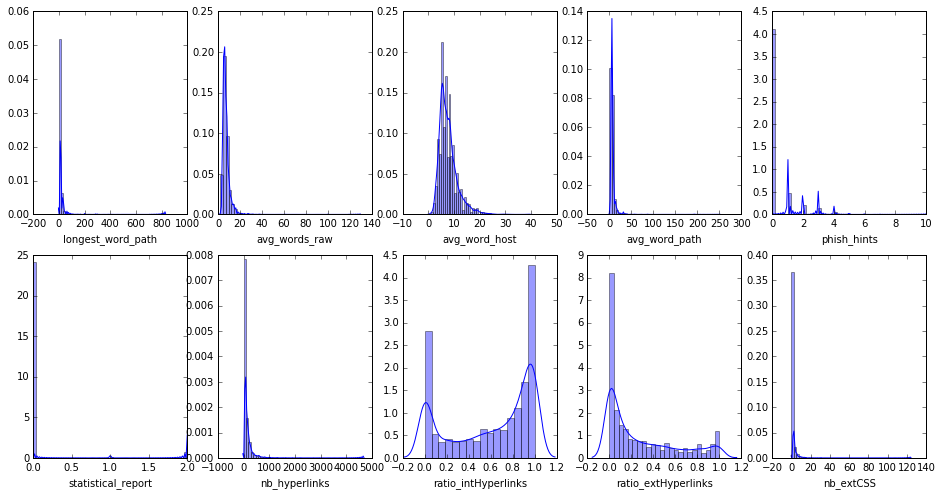

In [16]:
plot(df[cols_to_dist[30:40]], [2,5], cols_to_dist[30:40])

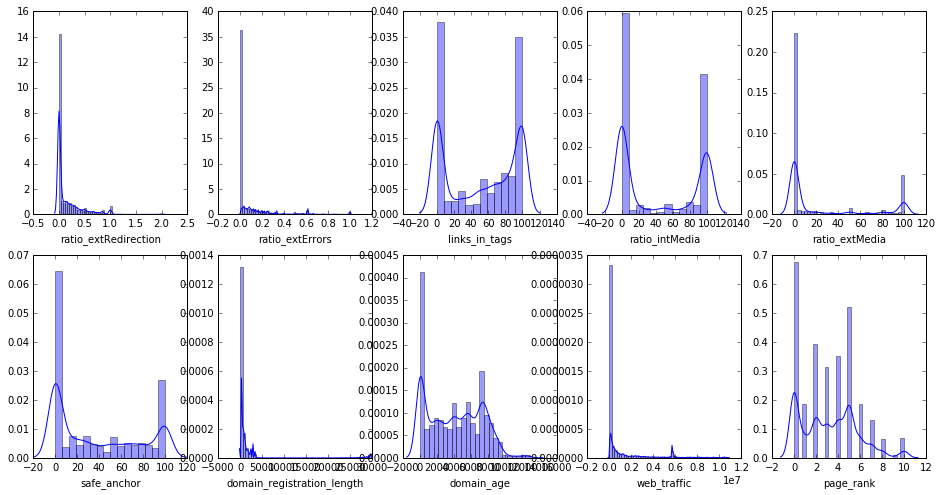

In [17]:
plot(df[cols_to_dist[40:50]], [2,5], cols_to_dist[40:50])

### longest word host and avg word host are normally distributed 

In [18]:
for ind,c in enumerate(cols):
    if 'random' in c or 'domain' in c:
        print(ind,c)

30 tld_in_subdomain
31 abnormal_subdomain
32 nb_subdomains
34 random_domain
51 domain_in_brand
52 brand_in_subdomain
78 domain_in_title
79 domain_with_copyright
80 whois_registered_domain
81 domain_registration_length
82 domain_age


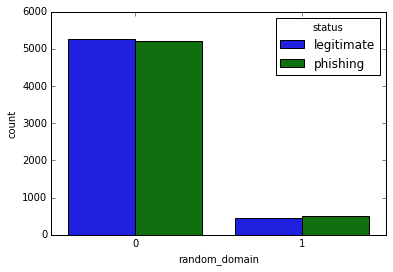

In [19]:
sns.countplot(df.random_domain, hue = df.status)

### looks like most of the domains with random names are legitmate

In [20]:
cols_to_count = [c for c in cols if c not in cols_to_dist]
normally_distributed_cols = ['longest_word_host']
len(cols_to_count)

38

In [21]:
avgs_cols = [c for c in cols if c[:3].lower() == 'avg']
avgs_cols

['avg_words_raw', 'avg_word_host', 'avg_word_path']

#### i dont feel like avg words raw , avg words host and avg word path are needed since we have shortest and longest cols for them

In [22]:
def get_percent(df, hue):
    hue_class = df[hue].unique()
    n = df.shape[0]
    for c in cols:
        print()
        print(f' {c} '.center(60,'='))
        print(f"{hue_class[0]} ====> {df[c][df[hue] == hue_class[0]].shape[0] / n}")
        print(f"{hue_class[1]} ====> {df[c][df[hue] == hue_class[1]].shape[0] / n}")

In [23]:
get_percent(df, 'status')


======================== length_url ========================
legitimate ====> 0.5
phishing ====> 0.5

===================== length_hostname ======================
legitimate ====> 0.5
phishing ====> 0.5

============================ ip ============================
legitimate ====> 0.5
phishing ====> 0.5

========================= nb_dots ==========================
legitimate ====> 0.5
phishing ====> 0.5

======================== nb_hyphens ========================
legitimate ====> 0.5
phishing ====> 0.5

========================== nb_at ===========================
legitimate ====> 0.5
phishing ====> 0.5

========================== nb_qm ===========================
legitimate ====> 0.5
phishing ====> 0.5

========================== nb_and ==========================
legitimate ====> 0.5
phishing ====> 0.5

========================== nb_or ===========================
legitimate ====> 0.5
phishing ====> 0.5

========================== nb_eq ===========================
legitimate ====> 0.5

#### looks like all the features have equally distributed classes

In [24]:
df['status'] = df.status.replace({'legitimate' : 0, 'phishing' : 1})

In [25]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [26]:
df = df.drop(avgs_cols + ['random_domain'], axis = 1)

In [27]:
from sklearn.model_selection import GridSearchCV as gscv, cross_val_score as cvs, StratifiedKFold as skf, train_test_split as tts
from sklearn.metrics import classification_report, confusion_matrix as cmm, accuracy_score as ass

from sklearn.preprocessing import MinMaxScaler as mms , RobustScaler as rs , StandardScaler as ss 

from sklearn.linear_model import LogisticRegression as lrr
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.naive_bayes import GaussianNB as gnb

In [28]:

def best_model(models, xt, yt, cols):
    results = [[] for _ in range(3)]
    cv = skf(n_splits = 10)
    for model in models:
        scores = cvs(model, xt, yt, cv = cv)
        results[0].append(scores.min())
        results[1].append(scores.max())
        results[2].append(scores.mean())
    
    return pd.DataFrame({
        'min'  : results[0],
        'max'  : results[1],
        'mean' : results[2]
    }, index = cols).T


def confmat(yt, pred):
    cm = cmm(yt, pred)
    sns.heatmap(cm.T, fmt = '.1f', annot = True)
    plt.ylabel('predicted')
    plt.xlabel('actual');
    
    
def report(yt, pred):
    print(classification_report(yt, pred))
        

In [31]:
x = df.drop(['status'], axis = 1)
y = df.status

std_scaler = ss()
mm_scaler = mms()
rb_scaler = rs()

stdX = std_scaler.fit_transform(x)
mmX = mm_scaler.fit_transform(x)
rbX = rb_scaler.fit_transform(x)

In [30]:
models = [lrr(), SVC(), rfc(), dtc(), gnb()]
names = ['Logistic regressor', 'svm', 'Random forest classifier', 'Decision tree classifier', 'Naive bayes']

### Normal x - no scaling

In [31]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, stratify = y)
y_train.shape , y_test.shape

((9144,), (2286,))

In [32]:
best_model(models, x_train, y_train, names)

,Logistic regressor,svm,Random forest classifier,Decision tree classifier,Naive bayes
min,0.785558,0.700219,0.948578,0.917943,0.723195
max,0.857768,0.747265,0.965066,0.945295,0.754923
mean,0.813422,0.725504,0.955926,0.933070,0.744094


### std scaled x

In [33]:
sx_train, sx_test, sy_train, sy_test = tts(stdX, y, test_size = 0.2, stratify = y)
sy_train.shape , sy_test.shape

((9144,), (2286,))

In [34]:
best_model(models, sx_train, sy_train, names)

,Logistic regressor,svm,Random forest classifier,Decision tree classifier,Naive bayes
min,0.933260,0.948690,0.946389,0.924508,0.660832
max,0.955142,0.963895,0.971554,0.947484,0.696937
mean,0.943133,0.955054,0.956363,0.934058,0.677604


### Min max scaler 

In [35]:
mx_train, mx_test, my_train, my_test = tts(mmX, y, test_size = 0.2, stratify = y)
my_train.shape , my_test.shape

((9144,), (2286,))

In [36]:
best_model(models, mx_train, my_train, names)

,Logistic regressor,svm,Random forest classifier,Decision tree classifier,Naive bayes
min,0.920131,0.902626,0.946389,0.925602,0.679039
max,0.948690,0.932166,0.974891,0.942013,0.730853
mean,0.937332,0.919180,0.957345,0.935367,0.703636


### Robust scaler

In [37]:
rx_train, rx_test, ry_train, ry_test = tts(rbX, y, test_size = 0.2, stratify = y)
ry_train.shape , ry_test.shape

((9144,), (2286,))

In [38]:
best_model(models, rx_train, ry_train, names)

,Logistic regressor,svm,Random forest classifier,Decision tree classifier,Naive bayes
min,0.938731,0.941048,0.943107,0.922319,0.695842
max,0.954048,0.959607,0.968341,0.940919,0.722707
mean,0.944552,0.950241,0.958877,0.929570,0.711064


#### random forest and svm gave the highest cv scores, lets try to improve them 

## SVM

In [30]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, stratify = y)

In [35]:
from sklearn.pipeline import Pipeline

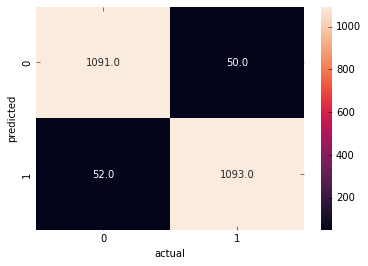

In [56]:
pipeline = Pipeline(steps = [('std', std_scaler), ('svm', SVC(C = 10))])
pipeline.fit(x_train,y_train)
pred = pipeline.predict(x_test)
confmat(y_test, pred)

In [57]:
report(y_test, pred)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1143
           1       0.95      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## Random forest classifier 

In [40]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, stratify = y)

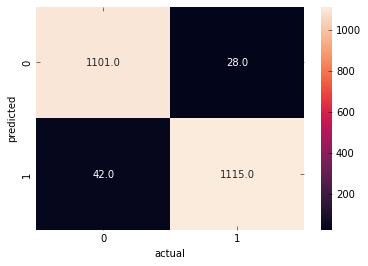

In [59]:
pipeline = Pipeline(steps = [('rbs', rb_scaler), ('rfc', rfc(bootstrap= False,
 max_depth= 80,
 min_samples_leaf= 1,
 n_estimators = 400))])
pipeline.fit(x_train,y_train)
pred = pipeline.predict(x_test)
confmat(y_test, pred)

In [60]:
report(y_test, pred)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1143
           1       0.96      0.98      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



### Random forest gave the best score of all 

In [33]:
import pickle 

In [36]:
pipeline = Pipeline(steps = [('std', std_scaler), ('svm', SVC(C = 10))])
pipeline.fit(x,y)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [37]:
with open('rfcModel', 'wb') as file:
    pickle.dump(pipeline, file)

### testing out the saved model

In [38]:
with open('rfcModel','rb') as file:    
    model = pickle.load(file)
model

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [41]:
spred = model.predict(x_test)

In [42]:
report(y_test, spred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1143
           1       0.99      0.99      0.99      1143

    accuracy                           0.99      2286
   macro avg       0.99      0.99      0.99      2286
weighted avg       0.99      0.99      0.99      2286



### After testing it out with more phishing sites , svm did better than random forest classifier 